# Statistics 

In [7]:
%cd C:\Users\tenis\OneDrive\Desktop\Data_Projects\Impact_Capital
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


C:\Users\tenis\OneDrive\Desktop\Data_Projects\Impact_Capital


In [4]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 50)
df = pd.read_csv('data/processed/df.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,recommended,confidence,probabilities,County,State,join_column,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino,Nonprofit Density,FinalReturnInd2016,FinalReturnInd2017,FinalReturnInd2018,summed_terminate_columns,Dissolved,org_size,Ratio_ProgramExp_Rev2016,TotalFunctionExpenses_ProgramServicesAmt2016,Ratio_ProgramExp_Totalexp2016,Ratio_ProgramExp_Rev2017,TotalFunctionExpenses_ProgramServicesAmt2017,Ratio_ProgramExp_Totalexp2017,Ratio_ProgramExp_Rev2018,TotalFunctionExpenses_ProgramServicesAmt2018,Ratio_ProgramExp_Totalexp2018,vulnerable2016,vulnerable2017,vulnerable2018,vulnerable,vulnerable2016_ps_decline,vulnerable2017_ps_decline,vulnerable2018_ps_decline,vulnerable_ps_decline,vulnerable2016_ps_total_decline,vulnerable2017_ps_total_decline,vulnerable2018_ps_total_decline,vulnerable_ps_total_decline
0,0,1,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County,California,"Los Angeles County, California",10038388.0,56196.0,5153776.0,515124.0,0.099951,26.9,8.0,0.2,14.0,48.2,6310.0,0,0,0,0.0,0,7.0281,1.143440,28578.0,0.430638,1.121038,126286.0,0.749178,5.876270,187453.0,0.785884,0,1,0,0,0,0,0,0,0,0,0,0
1,1,2,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,32549,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County,Florida,"Okaloosa County, Florida",192237.0,55880.0,99433.0,6253.0,0.062887,75.2,8.8,0.6,2.8,8.1,102.0,0,0,0,0.0,0,32.8752,0.984944,378372.0,0.997627,0.962167,416121.0,0.996518,0.968472,529120.0,0.997314,0,1,0,0,0,0,0,0,0,1,0,0
2,2,3,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,2111,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County,Massachusetts,"Suffolk County, Massachusetts",758919.0,5504

# Distribution of total nonprofit expenses. X axis is in billions of dollars 

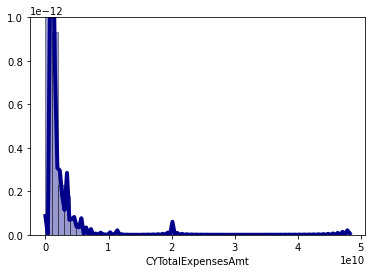

In [5]:
sns.distplot(df['CYTotalExpensesAmt'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Separating dataframes by category 

In [6]:
dfArtsCulture = df[df['recommended'] == "I"]
dfEducation = df[df['recommended'] == "II"]
dfEnviroment_Animals = df[df['recommended'] == "III"]
dfHealth = df[df['recommended'] == "IV"]
dfHumanServices = df[df['recommended'] == "V"]
dfInternational = df[df['recommended'] == "VI"]
dfSocietalBenefit = df[df['recommended'] == "VII"]
dfReligion = df[df['recommended'] == "VIII"]


# Logistic function that allows you to subset by category and remove outliers by percentile 
* It's broken into three parts. The first  includes the revenue diversification variable, and the second uses resource dependence

In [23]:
def logistic(data, low, high):
    "data = the dataframe to be used"
    "low = low end of quintile"
    "high = high end of quintile"
    

    df2015 = data[data['CYTotalExpensesAmt'].between(data['CYTotalExpensesAmt'].quantile(low), data['CYTotalExpensesAmt'].quantile(high))] # without outliers
    
    print("Before removing outliers","\n", data['CYTotalExpensesAmt'].describe(), "\n")
    df2015 = data[data['CYTotalExpensesAmt'].between(data['CYTotalExpensesAmt'].quantile(low), data['CYTotalExpensesAmt'].quantile(high))] # without outliers
    print("After removing outliers","\n", df2015['CYTotalExpensesAmt'].describe(),"\n")
    
    sns.distplot(df2015['CYTotalExpensesAmt'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    
    logistic = df2015[['FormationYr',
                   'org_size',
                   'Ratio_Equity_Revenue',
                   'Ratio_AdminExp_Exp',
                   'Operating_Margin',
                   'Revenue_Concentration',
                   'Population',
                   'Median Household Income', 
                   'Unemployment Rate',
                   'White', 
                   'Black',
                   'Native American',
                   'Asian',
                   'Latino',
                   'Nonprofit Density',
                   'Dissolved'
                     ]]


    #with concentration 
    logistic = logistic.replace([np.inf, -np.inf], np.nan)
    logistic = logistic.fillna(0)
    logistic['Dissolved'] = logistic['Dissolved'].astype(float)
    X = logistic.loc[:, logistic.columns != 'Dissolved']
    X_colnames = X.columns
    X = pd.DataFrame(X, columns = X_colnames)
    y = logistic.loc[:, logistic.columns == 'Dissolved']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    y_train=y_train.values.reshape(-1,1)
    logit_model=sm.Logit(y_train,X_train)
    result=logit_model.fit(max_iter=10000)
    print("Using Revenue Concentration", "\n",result.summary2())
    
    #With Dependence 
    logistic = df2015[['FormationYr',
                        'org_size',
                        'Ratio_Equity_Revenue',
                        'Ratio_AdminExp_Exp',
                        'Operating_Margin',
                        'Dependence_Grants',
                        'Dependence_Campaigns',
                        'Dependence_Memberships',
                        'Dependence_Fundraising', 
                        'Dependence_ProgramServ',
                        'Dependence_Invest',
                        'Population',
                       'Median Household Income', 
                       'Unemployment Rate',
                       'White', 
                       'Black',
                       'Native American',
                       'Asian',
                       'Latino',
                       'Nonprofit Density',
                       'Dissolved'
                     ]]

    logistic = logistic.replace([np.inf, -np.inf], np.nan)
    logistic = logistic.fillna(0)
    logistic['Dissolved'] = logistic['Dissolved'].astype(float)
    X = logistic.loc[:, logistic.columns != 'Dissolved']
    X_colnames = X.columns
    X = pd.DataFrame(X, columns = X_colnames)
    y = logistic.loc[:, logistic.columns == 'Dissolved']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    y_train=y_train.values.reshape(-1,1)
    logit_model=sm.Logit(y_train,X_train)
    result=logit_model.fit(max_iter=10000)
    print("Using Resource Dependence", "\n",result.summary2())
    
    return

Before removing outliers 
 count    8.934400e+04
mean     1.022213e+07
std      1.677326e+08
min     -1.552304e+06
25%      1.896542e+05
50%      4.763655e+05
75%      1.764422e+06
max      2.017714e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    7.951500e+04
mean     9.965743e+05
std      1.435323e+06
min      1.205000e+03
25%      1.760650e+05
50%      4.001830e+05
75%      1.119970e+06
max      7.775936e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.172000
         Iterations 14
Using Revenue Concentration 
                              Results: Logit
Model:                 Logit              Pseudo R-squared:   0.019     
Dependent Variable:    y                  AIC:                19177.0192
Date:                  2020-12-02 13:47   BIC:                19310.9244
No. Observations:      55660              Log-Likelihood:     -9573.5   
Df Model:              14               

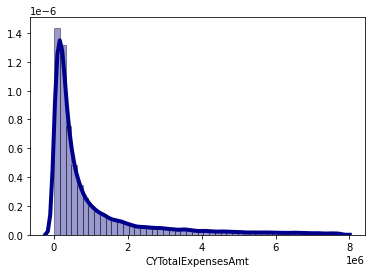

In [24]:
logistic_dissolved(dfHumanServices, 0.01, .9)